# BASIC I/O PYTHON
### Writting to disk

In [2]:
from pylab import plt, mpl
plt.style.use("seaborn")
mpl.rcParams['font.family']='serif'
%matplotlib inline

import pickle
import numpy as np
from random import gauss

a = [gauss(1.5,2) for i in range(1000000)]
path = 'out/'
pkl_file = open(path+'data.pkl','wb')

%time pickle.dump(a,pkl_file)

pkl_file.close()

C:\Users\16175\AppData\Local\Temp\ipykernel_11384\814044121.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


CPU times: total: 15.6 ms
Wall time: 27 ms


In [18]:
pkl_file = open(path+'data.pkl','rb')
%time b = pickle.load(pkl_file)

CPU times: total: 46.9 ms
Wall time: 102 ms


In [19]:
print(a[:3])
print(b[:3])
print(np.allclose(np.array(a),np.array(b)))

[5.166756816330234, 4.161590629168226, 1.1498932946875502]
[5.166756816330234, 4.161590629168226, 1.1498932946875502]
True


In [20]:
pkl_file = open(path+'data.pkl','wb')

%time pickle.dump(np.array(a),pkl_file)
%time pickle.dump(np.array(a) ** 2,pkl_file)
pkl_file.close()

CPU times: total: 0 ns
Wall time: 49.1 ms
CPU times: total: 0 ns
Wall time: 47 ms


In [21]:
pkl_file = open(path+'data.pkl','rb')
x = pickle.load(pkl_file)
print(x[:4])

y = pickle.load(pkl_file)
print(y[:4])

pkl_file.close()

[5.16675682 4.16159063 1.14989329 5.11326299]
[26.695376   17.31883656  1.32225459 26.14545837]


In [5]:
pkl_file = open(path+'data.pkl','wb')
pickle.dump({'x':x,'y':y},pkl_file)
pkl_file.close()

pkl_file = open(path+'data.pkl','rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key,data[key][:4])

NameError: name 'x' is not defined

### Read writing text files

In [9]:
import pandas as pd
rows = 5000
a = np.random.standard_normal((rows,5)).round(4)
print(a)
t = pd.date_range(start='2019/1/1',periods=rows,freq='H')
print(t)
csv_file = open(path+'data.csv','w')
header = 'data,no1,no2,no3,no4,no5\n'
csv_file.write(header)

for t_,(no1,no2,no3,no4,no5) in zip(t,a):
    s = '{},{},{},{},{},{}\n'.format(t_,no1,no2,no3,no4,no5)
    csv_file.write(s)
    
csv_file.close()

[[-0.1232 -0.5229 -1.019  -0.1284 -0.7375]
 [ 0.0259 -3.1375  0.3839  0.8338 -0.8868]
 [ 0.6228 -0.41    0.1433 -0.966  -0.1152]
 ...
 [-0.5773  0.0679  0.4482 -0.1743  0.7575]
 [ 1.5632  0.6722 -1.7328  1.9237 -1.5886]
 [-1.1575 -1.0932 -2.8539  1.0326 -0.374 ]]
DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')


In [10]:
csv_file = open(path+'data.csv','r')
for i in range(5):
    print(csv_file.readline(),end='')
    
csv_file.close()

data,no1,no2,no3,no4,no5
2019-01-01 00:00:00,-0.1232,-0.5229,-1.019,-0.1284,-0.7375
2019-01-01 01:00:00,0.0259,-3.1375,0.3839,0.8338,-0.8868
2019-01-01 02:00:00,0.6228,-0.41,0.1433,-0.966,-0.1152
2019-01-01 03:00:00,0.9022,1.4013,2.0702,-0.0144,-0.093


In [12]:
csv_file = open(path+'data.csv','r')
content = csv_file.readlines()
print(content[:5])
csv_file.close()

['data,no1,no2,no3,no4,no5\n', '2019-01-01 00:00:00,-0.1232,-0.5229,-1.019,-0.1284,-0.7375\n', '2019-01-01 01:00:00,0.0259,-3.1375,0.3839,0.8338,-0.8868\n', '2019-01-01 02:00:00,0.6228,-0.41,0.1433,-0.966,-0.1152\n', '2019-01-01 03:00:00,0.9022,1.4013,2.0702,-0.0144,-0.093\n']


### Working with SQL Databases

In [33]:
import sqlite3 as sq3
con = sq3.connect(path+'numbs.db')
query = 'CREATE TABLE numbs (DATE date, No1 real, No2 real)'
con.execute(query)
con.commit()
q = con.execute
q('SELECT * FROM sqlite_master').fetchall()

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (DATE date, No1 real, No2 real)')]

In [34]:
import datetime

now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?, ?, ?)',(now,0.12,7.3))
np.random.seed(100)
data = np.random.standard_normal((10000,2)).round(4)

%time
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?, ?, ?)',(now,row[0],row[1]))
con.commit()

q('SELECT * FROM numbs').fetchmany(4)

CPU times: total: 0 ns
Wall time: 0 ns


[('2023-11-08 20:53:15.283629', 0.12, 7.3),
 ('2023-11-08 20:53:15.286629', -1.7498, 0.3427),
 ('2023-11-08 20:53:15.286629', 1.153, -0.2524),
 ('2023-11-08 20:53:15.286629', 0.9813, 0.5142)]

In [35]:
q('SELECT * FROM numbs WHERE no1 > 0.5').fetchmany(4)

[('2023-11-08 20:53:15.286629', 1.153, -0.2524),
 ('2023-11-08 20:53:15.286629', 0.9813, 0.5142),
 ('2023-11-08 20:53:15.286629', 0.6727, -0.1044),
 ('2023-11-08 20:53:15.286629', 1.619, 1.5416)]

In [36]:
pointer = q('SELECT * FROM numbs')
for i in range(3):
    print(pointer.fetchone())


('2023-11-08 20:53:15.283629', 0.12, 7.3)
('2023-11-08 20:53:15.286629', -1.7498, 0.3427)
('2023-11-08 20:53:15.286629', 1.153, -0.2524)


In [37]:
rows = pointer.fetchall()
rows[:3]

[('2023-11-08 20:53:15.286629', 0.9813, 0.5142),
 ('2023-11-08 20:53:15.286629', 0.2212, -1.07),
 ('2023-11-08 20:53:15.286629', -0.1895, 0.255)]

In [39]:
q('DROP TABLE IF EXISTS numbs')

q('SELECT * FROM sqlite_master').fetchall()

con.close()

### Read and Writing with Numpy

In [45]:
dtimes =  np.arange('2019-01-01 10:00:00','2025-12-31 22:00:00', dtype='datetime64[m]')

print("dtypes", dtimes)
print("len",len(dtimes))

dty = np.dtype([('Date','datetime64[m]'),('No1','f'),('No2','f')])
print("dty",dty)
data = np.zeros(len(dtimes),dtype=dty)
print("data",data)
data['Date'] = dtimes

a = np.random.standard_normal((len(dtimes),2)).round(4)

print("standard nomial",a)
data['No1'] = a[:,0]
data['No2'] = a[:,1]
data.nbytes

print("data",data)

dtypes ['2019-01-01T10:00' '2019-01-01T10:01' '2019-01-01T10:02' ...
 '2025-12-31T21:57' '2025-12-31T21:58' '2025-12-31T21:59']
len 3681360
dty [('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')]
data [('1970-01-01T00:00', 0., 0.) ('1970-01-01T00:00', 0., 0.)
 ('1970-01-01T00:00', 0., 0.) ... ('1970-01-01T00:00', 0., 0.)
 ('1970-01-01T00:00', 0., 0.) ('1970-01-01T00:00', 0., 0.)]
standard nomial [[-1.923   0.3162]
 [ 0.2706 -0.5493]
 [-1.7517 -0.6361]
 ...
 [-1.5207 -1.9056]
 [ 1.0261  0.8195]
 [-0.611   1.1201]]
data [('2019-01-01T10:00', -1.923 ,  0.3162)
 ('2019-01-01T10:01',  0.2706, -0.5493)
 ('2019-01-01T10:02', -1.7517, -0.6361) ...
 ('2025-12-31T21:57', -1.5207, -1.9056)
 ('2025-12-31T21:58',  1.0261,  0.8195)
 ('2025-12-31T21:59', -0.611 ,  1.1201)]


In [46]:
%time np.save(path + 'array',data)

CPU times: total: 0 ns
Wall time: 119 ms


In [48]:
%time np.load(path+'array.npy')

%time data = np.random.standard_normal((10000,6000)).round(4)

CPU times: total: 31.2 ms
Wall time: 44 ms
CPU times: total: 1.72 s
Wall time: 1.75 s


### More SQL

In [50]:
data = np.random.standard_normal((1000000,5)).round(4)
data[:3]
file_name = path+"numbers"
con = sq3.Connection(file_name+'.db')
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real,No4 real,No5 real)'
q = con.execute
qm =con.executemany

q(query)

In [52]:
%%time
qm('INSERT INTO numbers values (?, ?, ?, ?, ? )',data)
con.commit()

CPU times: total: 2.73 s
Wall time: 3.19 s


In [53]:
%%time
temp = q('SELECT * FROM numbers').fetchall()
print(temp[:3])

[(0.5413, 0.1151, -1.5741, 0.3184, 1.1891), (-1.6463, -0.1606, -0.7575, -1.3068, 0.1465), (-0.3327, -0.6076, 0.2409, -0.4397, -0.7402)]
CPU times: total: 1.14 s
Wall time: 1.33 s


In [68]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(q(query).fetchall()).round(3)

CPU times: total: 422 ms
Wall time: 596 ms


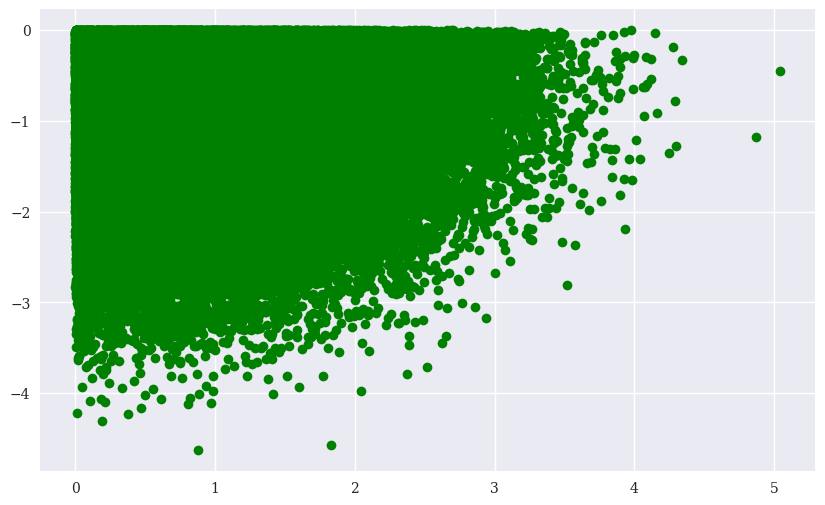

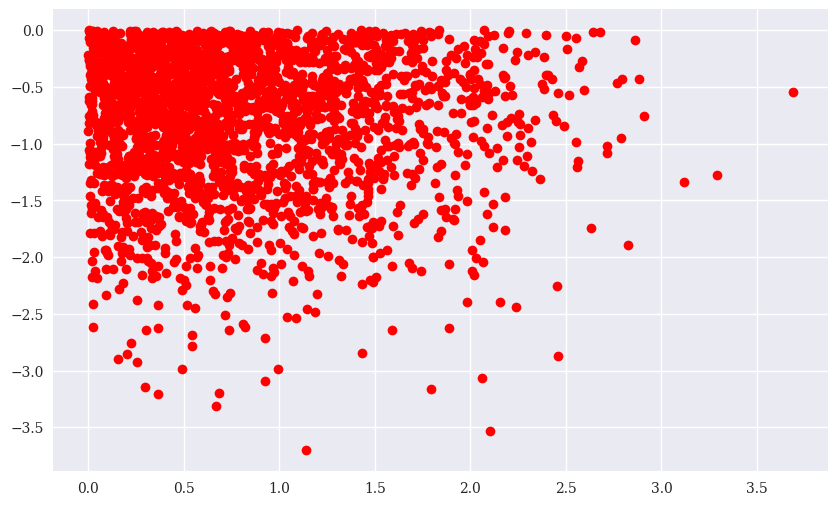

In [69]:
res2 = res[::100]
res3 = res[::300]
plt.figure(figsize=(10,6))
plt.plot(res[:,0],res[:,1],'go')


plt.figure(figsize=(10,6))
plt.plot(res[:,0],res[:,1],'ro')

In [74]:
%time data = pd.read_sql('SELECT * FROM numbers',con)

CPU times: total: 1.48 s
Wall time: 1.7 s


In [76]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: total: 0 ns
Wall time: 28 ms


,No1,No2,No3,No4,No5
4,1.1450,-0.2420,0.2656,-0.3457,0.0669
7,0.8431,-1.1141,0.2209,0.8384,0.2291
13,1.2383,-1.8668,-0.3942,-1.7672,1.4587
16,0.2710,-1.0491,1.2269,-0.1852,-0.4591
17,0.2532,-1.1418,0.5590,-0.2785,0.4445


CPU times: total: 31.2 ms
Wall time: 62 ms


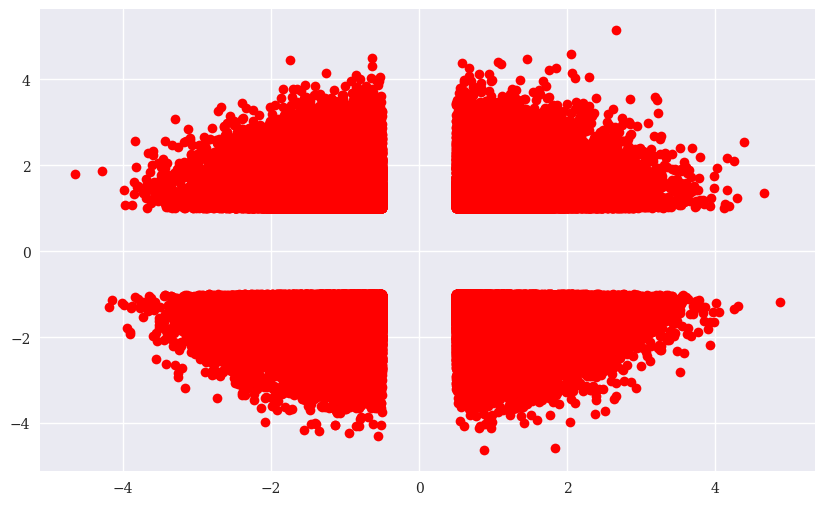

In [77]:
%%time 
q = '(No1 < -0.5 | No1 > 0.5) & (No2 < -1 | No2 > 1)'
res = data[['No1','No2']].query(q)
plt.figure(figsize=(10,6))
plt.plot(res['No1'],res['No2'],'ro')